Logistic Regression with sicket learn (Part 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
hours = np.array([0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 1.75, 2.0, 2.25,
                  2.5, 2.75, 3.0, 3.25, 3.5, 4.0, 4.25, 4.5, 4.75, 5.0, 5.5 ]) # sample data for exam times from students

In [6]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) #results pass or fail

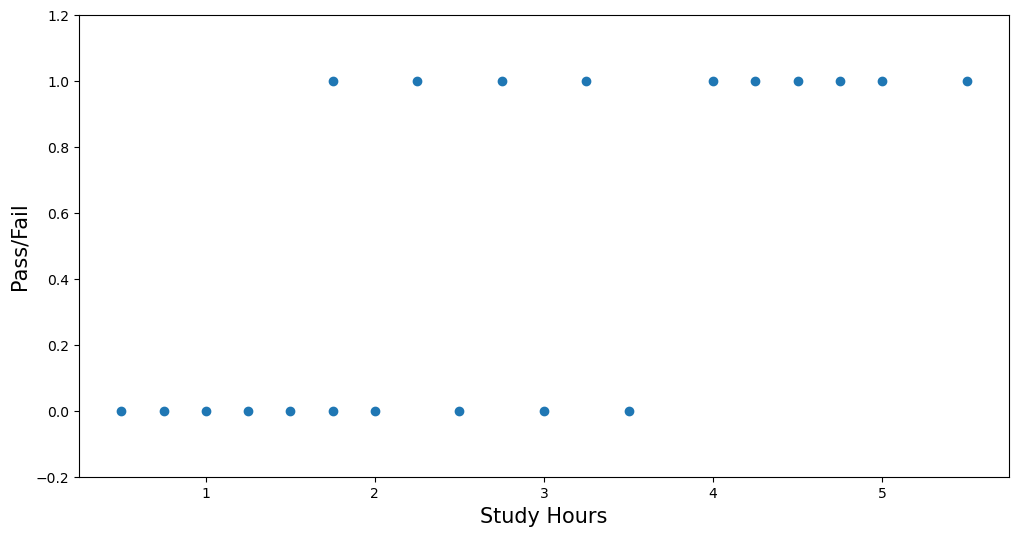

In [8]:
plt.figure(figsize = (12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()

In [10]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [12]:
data

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [14]:
from sklearn.linear_model import LinearRegression # import lm model

In [15]:
lm = LinearRegression(fit_intercept = True)

In [18]:
lm.fit(data.hours.to_frame(), data.success)

LinearRegression()

In [20]:
lm.coef_

array([0.23459561])

In [22]:
lm.intercept_

-0.1539352689884873

In [24]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


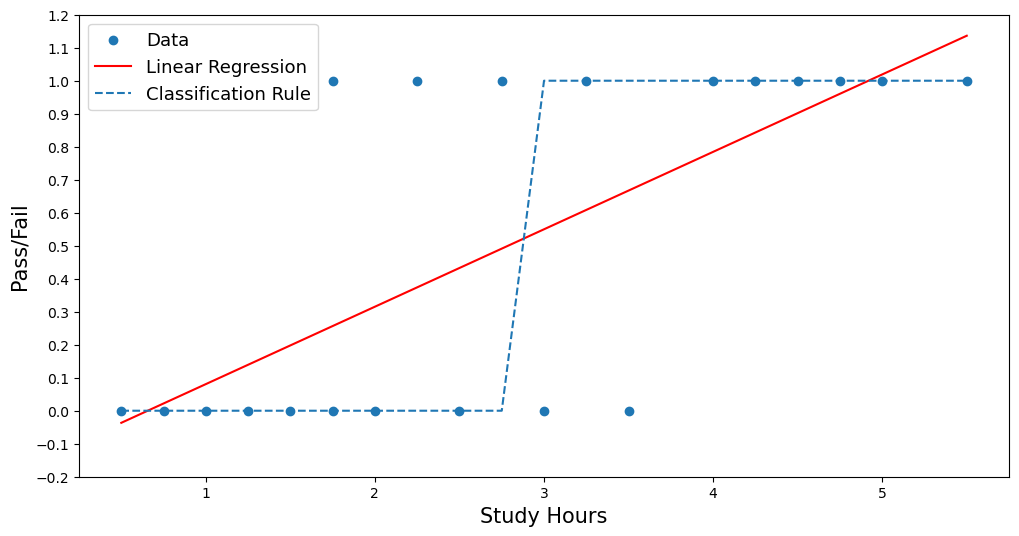

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label="Data")
plt.plot(data.hours, data.pred, color="red", label="Linear Regression")
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = "--", label = "Classification Rule") #adjustemnt for classification rule
plt.legend(fontsize=13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))  # Fixed typo here
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize=15)
plt.ylabel("Pass/Fail", fontsize=15)
plt.show()

////////////////////////////////////////////

Logistic Regression with sickit-learn, Part 2

Classification 

In [56]:
from sklearn.linear_model import LogisticRegression

In [58]:
lm = LogisticRegression()

In [60]:
data

,hours,success,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


In [62]:
lm.fit(data.hours.to_frame(), data.success)

LogisticRegression()

In [64]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


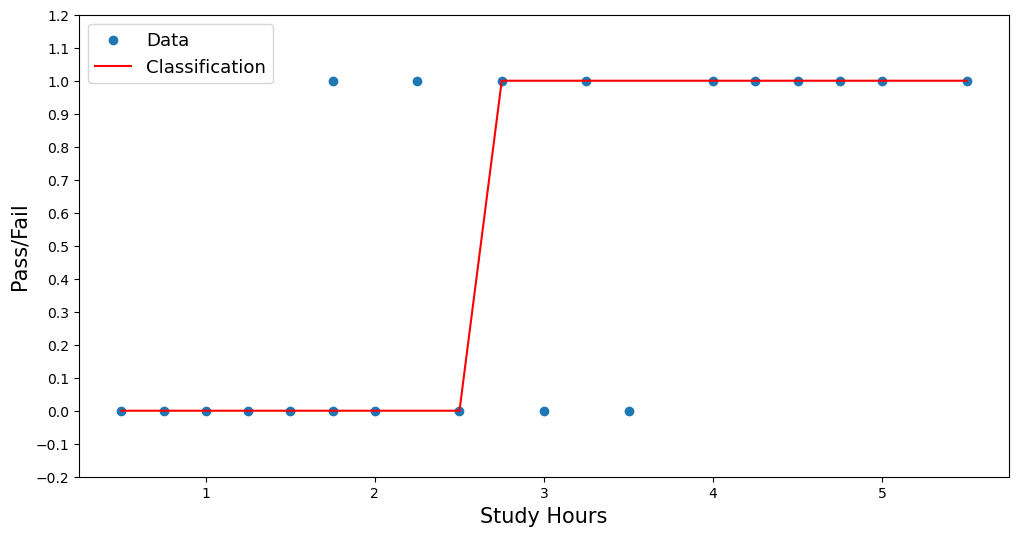

In [66]:
plt.figure(figsize = (12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

In [68]:
proba = lm.predict_proba(data.hours.to_frame())
proba

array([[0.92861721, 0.07138279],
       [0.90707537, 0.09292463],
       [0.87987361, 0.12012639],
       [0.84606045, 0.15393955],
       [0.80484065, 0.19515935],
       [0.75576968, 0.24423032],
       [0.75576968, 0.24423032],
       [0.69897507, 0.30102493],
       [0.63534559, 0.36465441],
       [0.56660579, 0.43339421],
       [0.49520342, 0.50479658],
       [0.42399618, 0.57600382],
       [0.35581092, 0.64418908],
       [0.2930129 , 0.7069871 ],
       [0.18920231, 0.81079769],
       [0.14900776, 0.85099224],
       [0.11612919, 0.88387081],
       [0.08974025, 0.91025975],
       [0.06888056, 0.93111944],
       [0.03998596, 0.96001404]])